In [1]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *

## pump on full moon, sell on new

In [120]:
import datetime
import ephem



def get_moons_in_year(year):
    """
    https://stackoverflow.com/questions/2526815/moon-lunar-phase-algorithm
    """

  moons=[]

  date=ephem.Date(datetime.date(year,1,1))
    
  while date.datetime().year==year:
    
    date=ephem.next_full_moon(date)

    moons.append( (date.datetime(),'full') )

  date=ephem.Date(datetime.date(year,1,1))

  while date.datetime().year==year:
    date=ephem.next_new_moon(date)
    moons.append( (date.datetime(),'new') )

  moons.sort(key=lambda x: x[0])

  return moons

yrs = np.arange(2016,2023,1)

df = []

for i in yrs:
    df.append(pd.DataFrame(get_moons_in_year(i)))
    
whole = pd.concat(df)
whole[0] = pd.to_datetime(whole[0]).dt.strftime('%Y-%m-%d')
whole.rename(columns={0:'Date'},inplace=True)
whole.set_index('Date',inplace=True)
whole.index = pd.to_datetime(whole.index)
whole=whole[:'2022-10-07']
whole=whole[~whole.index.duplicated(keep='last')]


In [113]:
btc = yf.Ticker("BTC-USD").history(period="7y",interval = '1d')
btc  = btc['Close'].dropna()
btc=btc['2016':]


Date
2016-01-01      434.334015
2016-01-02      433.437988
2016-01-03      430.010986
2016-01-04      433.091003
2016-01-05      431.959991
                  ...     
2022-10-03    19623.580078
2022-10-04    20336.843750
2022-10-05    20160.716797
2022-10-06    19955.443359
2022-10-07    19640.986328
Name: Close, Length: 2472, dtype: float64

In [146]:
sig = pd.concat([btc,whole],axis=1)
sig[1] = sig[1].map({'full': 1, 'new': 0})
sig[1] = sig[1].ffill()

sig = sig['2017':]

sig[1].value_counts()

0.0    1056
1.0    1050
Name: 1, dtype: int64

In [150]:
returns = backtester(sig[1],sig['Close'])
dd = max_dd(returns.pct_change().dropna().values.ravel())
wr = win_rate(sig[1], returns)

In [152]:
dd

-0.8394073882381066

In [151]:
wr

0.2423954372623574

In [178]:
display('Strat',(returns.iloc[-1]-1)[0])
display('BTC',(sig['Close']/sig['Close'][0]).iloc[-1]-1)

'Strat'

0.5651293053072426

'BTC'

18.673939937359677

<AxesSubplot:xlabel='Date'>

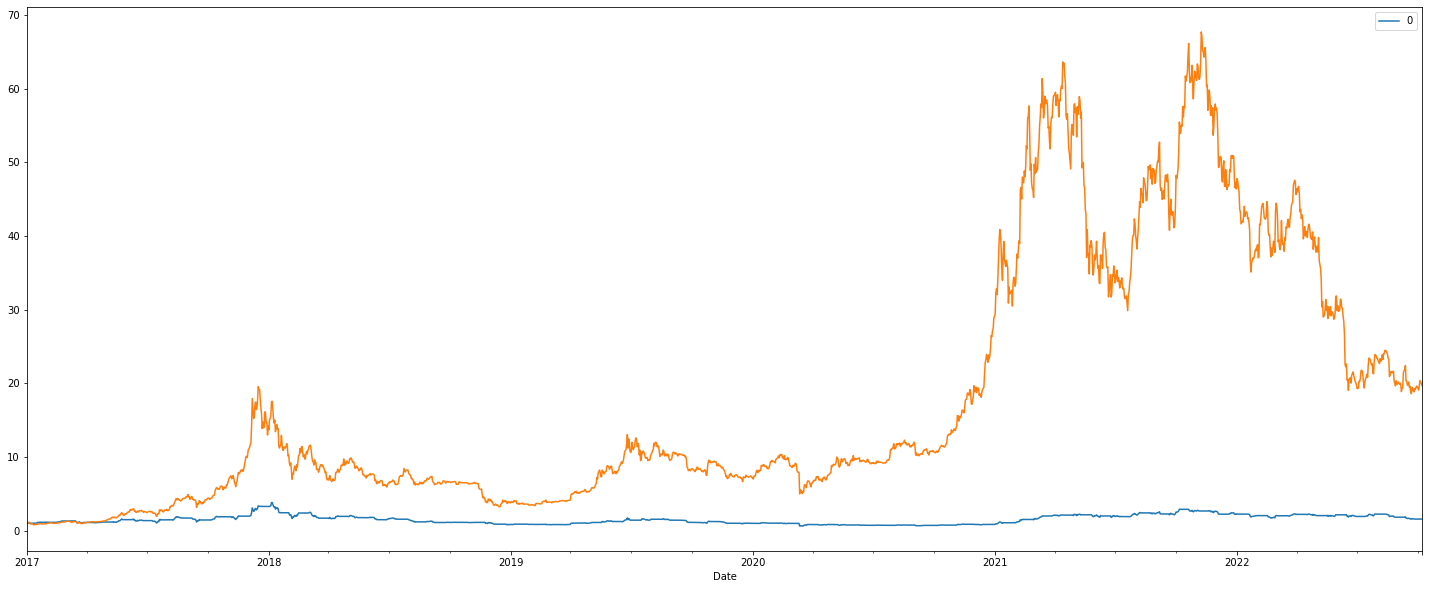

In [180]:
returns.plot(figsize=(25,10))
(sig['Close']/sig['Close'][0]).plot()